<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-Mastery-with-Python/blob/main/6.%20Feature%20Selection%20For%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection For Machine Learning**

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance. In this chapter you will discover automatic feature selection techniques that you can use to prepare your machine learning data in Python with scikit-learn. After completing this lesson you will know how to use:

1. Univariate Selection.
2. Recursive Feature Elimination.
3. Principle Component Analysis.
4. Feature Importance.

**6.1 Feature Selection**

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression. Three benefits of performing feature selection before modeling your data are:

•	Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

•	Improves Accuracy: Less misleading data means modeling accuracy improves.

•	Reduces Training Time: Less data means that algorithms train faster.


**6.2 Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.


In [ ]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): plas, test, mass and age. I got the names for the chosen attributes by manually mapping the index of the 4 highest scores to the index of the attribute names.

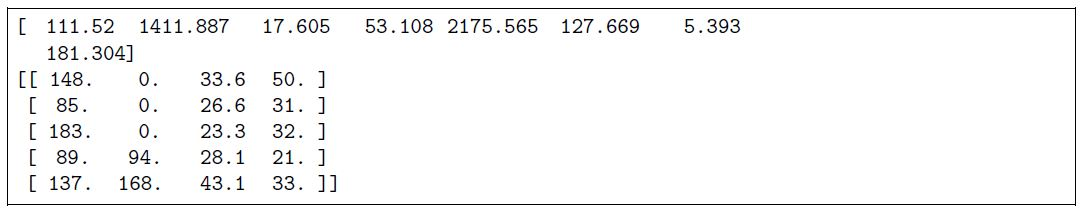

**6.3 Recursive Feature Elimination**

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. You can learn more about the RFE class3 in the scikit-learn documentation. The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.


In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

You can see that RFE chose the top 3 features as preg, mass and pedi. These are marked True in the support array and marked with a choice 1 in the ranking array. Again, you can manually map the feature indexes to the indexes of attribute names.

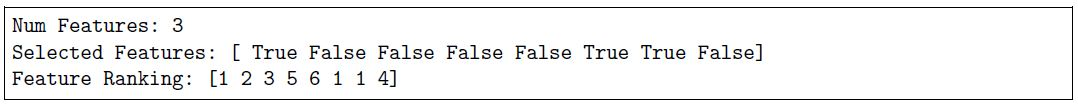

**6.4 Principal Component Analysis**

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the example below, we use PCA and select 3 principal components. Learn more about the PCA class in scikit-learn by reviewing the API.


In [ ]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

You can see that the transformed dataset (3 principal components) bear little resemblance to the source data.

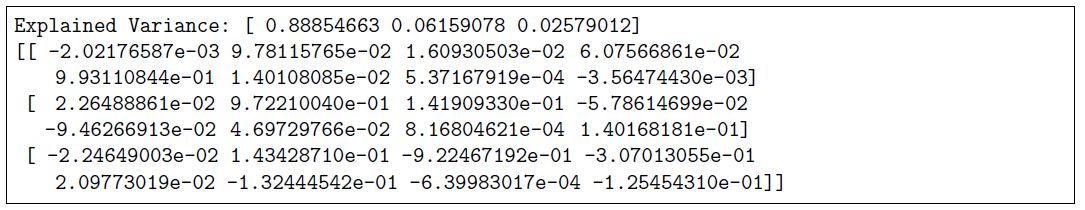

**6.5 Feature Importance**

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.


In [ ]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

You can see that we are given an importance score for each attribute where the larger the score, the more important the attribute. The scores suggest at the importance of plas, age and mass.

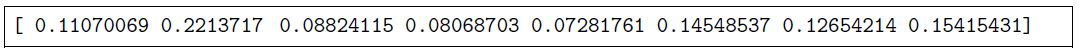